In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from simulation import *
from analysis import *
from end_to_end import *

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### Assumptions:
- Removed inmates can be any state
- Avg. degree of new nodes is correlated with current prison population (aka p is constant)

## Set Parameters

In [336]:
# Set G(n,p) model-specific parameters
N = 3000 # number of individuals
p = 0.03 # probability an edge is formed between any node and any other

# Set simulation-specific parameters
birth_number = 0 # number of new inmates at each time step

release_number = 0 # number of inmates released at times after next condition
number_of_infected_before_release = 100

death_rate = 0.013 # percent of recovered that die
rho = 0.01 # percent of initial nodes that are infected

tau = 0.03 # transmission rate
gamma = 0.5 # recovery rate
max_time = 20 # how many time steps to run simulation

percent_infected = 0.0
percent_recovered = 0

{'birth_number': 0, 'release_number': 0, 'number_infected_before_release': 100, 'rho': 0.01, 'death_rate': 0.013, 'tau': 0.03, 'gamma': 1.0, 'max_time': 20, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0, 'percent_recovered': 0, 'save_plot': True}


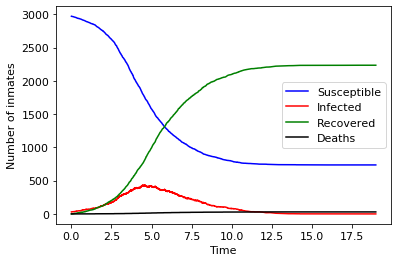

Total # of infections:  2264
Total # of deaths:  30.0


In [362]:
t, S, I, R, D = end_to_end(birth_number, release_number, number_of_infected_before_release, rho, max_time=max_time, \
                           death_rate=death_rate,\
                           percent_recovered=percent_recovered, percent_infected=percent_infected, tau=tau, save_plot=True)